In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv("C:/Users/MANOJ/Documents/Week7/aps_failure_training_set.csv", skiprows=19, na_values=["na"])
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [3]:
data.isnull().sum() # to check for missing values in each column
# We can exclude 'ab_000' from the dataset, out of 60000 datapoints 46329 datapoints are missing.

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [4]:
data = data.drop(['ab_000'], axis = 1)
data.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [5]:
# to fill all the missing values in each column with respect to their mean
for i in range(1,170):
    print(f"Filling NaN values in {[data.columns[i]]} with {data[data.columns[i]].mean()}")
    data[data.columns[i]].fillna(value = data[data.columns[i]].mean(), inplace = True)

Filling NaN values in ['aa_000'] with 59336.499566666665
Filling NaN values in ['ac_000'] with 356014263.03146565
Filling NaN values in ['ad_000'] with 190620.6393141186
Filling NaN values in ['ae_000'] with 6.8191304347826085
Filling NaN values in ['af_000'] with 11.006817391304347
Filling NaN values in ['ag_000'] with 221.63636670093882
Filling NaN values in ['ag_001'] with 975.7222606145392
Filling NaN values in ['ag_002'] with 8606.014529151005
Filling NaN values in ['ag_003'] with 88591.28109356301
Filling NaN values in ['ag_004'] with 437096.63237202715
Filling NaN values in ['ag_005'] with 1108373.8302685027
Filling NaN values in ['ag_006'] with 1657817.886227646
Filling NaN values in ['ag_007'] with 499309.80417670956
Filling NaN values in ['ag_008'] with 35569.89108193295
Filling NaN values in ['ag_009'] with 5114.75315612938
Filling NaN values in ['ah_000'] with 1809931.1761098476
Filling NaN values in ['ai_000'] with 9016.96542082835
Filling NaN values in ['aj_000'] with 114

In [6]:
data.isnull().sum() # All the missing values are filled with the corresponding mean

class     0
aa_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 170, dtype: int64

In [7]:
label = data['class']
data = data.drop(['class'], axis = 1)

In [8]:
data.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [9]:
data.describe()
# To scale all the values of columns to the range which is comparable so that the one feature doesn't over dominate the other features.

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,5.933650e+04,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,4.370966e+05,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,7.724678e+08,3.504515e+07,158.142022,205.375337,2.036363e+04,3.400875e+04,1.494791e+05,7.574598e+05,2.360968e+06,...,1.149060e+06,5.402722e+05,1.161763e+06,1.114758e+06,1.063164e+06,1.718366e+06,4.469894e+05,4.720424e+04,4.268529,8.627929
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,2.000000e+01,4.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.180000e+02,...,3.033500e+03,1.204000e+03,2.848500e+03,3.839000e+03,5.600000e+02,1.180000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,1.880000e+02,2.880000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.881000e+03,...,2.397270e+05,1.148530e+05,2.283220e+05,1.960600e+05,9.976600e+04,4.358700e+04,4.474000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,1.686000e+03,8.426500e+03,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.361500e+04,...,4.454897e+05,2.164440e+05,4.624655e+05,4.003010e+05,2.833455e+05,1.732245e+05,1.387300e+05,2.366000e+03,0.000000,0.000000
max,2.746564e+06,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,2.288306e+08,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [10]:
col = data.columns

In [11]:
Std_scaler = StandardScaler()
df = Std_scaler.fit_transform(data.to_numpy())
df = pd.DataFrame(df, columns=col)

In [12]:
(df.head())

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.119381,2.297451,-5.431343e-03,-0.043121,-0.053594,-0.010884,-0.028691,-0.057574,-0.116959,-0.169358,...,0.691902,0.522440,0.236978,0.068038,0.005736,-0.109591,-0.146551,-0.177717,-0.021220,-0.024659
1,-0.180697,-0.460883,8.304736e-19,-0.043121,-0.053594,-0.010884,-0.028691,-0.057574,-0.116959,-0.177404,...,-0.020965,-0.061196,-0.131205,-0.133241,-0.187559,-0.154294,-0.092070,-0.145940,-0.021220,-0.024659
2,-0.125811,-0.460883,-5.436479e-03,-0.043121,-0.053594,-0.010884,-0.028691,-0.057574,-0.116959,-0.184438,...,-0.146305,-0.094980,-0.018715,0.014010,-0.011581,-0.109552,-0.097547,-0.166828,-0.021220,-0.024659
3,-0.407928,-0.460883,-5.437449e-03,-0.043121,-0.004902,-0.010884,-0.028691,-0.057574,-0.116540,-0.184199,...,-0.387494,-0.390696,-0.383624,-0.353355,-0.313264,-0.201514,-0.310368,-0.177717,0.915878,3.684257
4,0.010572,-0.460881,-5.426264e-03,-0.043121,-0.053594,-0.010884,-0.028691,-0.057574,-0.116959,-0.166604,...,0.153624,0.034545,-0.034806,-0.041945,-0.043365,-0.020200,0.660478,-0.151914,-0.021220,-0.024659


In [13]:
df.describe()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04
mean,4.736952e-19,1.456613e-17,1.865175e-18,-9.444297e-18,7.875182e-18,5.921189e-19,-1.006602e-17,-1.350031e-17,1.468455e-17,3.582320e-17,...,2.344791e-17,-6.181722e-17,-2.463215e-17,6.513308e-18,-8.206769e-17,-1.705303e-17,-3.019807e-17,-1.006602e-18,-3.789561e-18,-3.671137e-18
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-4.080105e-01,-4.608829e-01,-5.439332e-03,-4.312065e-02,-5.359411e-02,-1.088402e-02,-2.869057e-02,-5.757384e-02,-1.169594e-01,-1.851360e-01,...,-3.877025e-01,-3.907812e-01,-3.836739e-01,-3.533946e-01,-3.132733e-01,-2.015137e-01,-3.103678e-01,-1.777167e-01,-2.122036e-02,-2.465914e-02
25%,-4.022758e-01,-4.608829e-01,-5.438134e-03,-4.312065e-02,-5.359411e-02,-1.088402e-02,-2.869057e-02,-5.757384e-02,-1.169594e-01,-1.850013e-01,...,-3.850624e-01,-3.885527e-01,-3.812220e-01,-3.499507e-01,-3.127466e-01,-2.014450e-01,-3.103678e-01,-1.777167e-01,-2.122036e-02,-2.465914e-02
50%,-1.963881e-01,-4.608827e-01,-5.431114e-03,-4.312065e-02,-5.359411e-02,-1.088402e-02,-2.869057e-02,-5.757384e-02,-1.169594e-01,-1.834922e-01,...,-1.790720e-01,-1.781958e-01,-1.871416e-01,-1.775164e-01,-2.194338e-01,-1.761481e-01,-3.003586e-01,-1.777167e-01,-2.122036e-02,-2.465914e-02
75%,-7.335890e-02,-4.608807e-01,-5.198884e-03,-4.312065e-02,-5.359411e-02,-1.088402e-02,-2.869057e-02,-5.757384e-02,-1.169594e-01,-1.624269e-01,...,0.000000e+00,9.842441e-03,1.440168e-02,5.700658e-03,-4.675961e-02,-1.007052e-01,-6.511132e-17,-1.275937e-01,-2.122036e-02,-2.465914e-02
max,1.847795e+01,2.297451e+00,2.449463e+02,1.330662e+02,9.767074e+01,1.658201e+02,1.208051e+02,7.054055e+01,8.358729e+01,9.673802e+01,...,6.743692e+01,6.949752e+01,8.324200e+01,5.116963e+01,2.941691e+01,6.938850e+01,4.279481e+01,8.053769e+01,1.128992e+02,1.328009e+02


In [14]:
x_train, x_test, y_train, y_test = train_test_split(df, label, test_size=0.2, random_state=42, stratify=label)
# Results in 80% training data, 20% test data

In [15]:
X_train, x_val, Y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=42, stratify=y_train)
# Results in 70% training data, 10% Validation data

In [16]:
Y_train.value_counts()

neg    41300
pos      700
Name: class, dtype: int64

In [17]:
y_val.value_counts()

neg    5900
pos     100
Name: class, dtype: int64

In [18]:
y_test.value_counts()

neg    11800
pos      200
Name: class, dtype: int64

### Fitting decision tree by cross validating for hyper parameters {depth, leaf size}

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
parameters = {'max_depth':[i for i in range(1,4)], 'min_samples_leaf': [i for i in range(1,5)]}

In [21]:
model = DecisionTreeClassifier()

In [22]:
C = GridSearchCV(model, param_grid=parameters, cv=5)
C.fit(x_val,y_val)
Model_DT = C.best_estimator_
print(f"Best Decision Tree parameters: {C.best_params_}")

Best Decision Tree parameters: {'max_depth': 3, 'min_samples_leaf': 4}


In [23]:
Model_DT.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=4)

In [24]:
x_train_pred = Model_DT.predict(X_train)
x_train_pred

array(['neg', 'neg', 'neg', ..., 'neg', 'neg', 'neg'], dtype=object)

In [25]:
x_val_predict = Model_DT.predict(x_val)
x_val_predict

array(['neg', 'neg', 'neg', ..., 'neg', 'neg', 'neg'], dtype=object)

In [26]:
x_test_predict = Model_DT.predict(x_test)
x_test_predict

array(['neg', 'neg', 'neg', ..., 'neg', 'neg', 'neg'], dtype=object)

#### The Accuracy Metric is misleading when there exsists huge class imbalance in the dataset. In the problem there exsists significant class imbalance of (1:59) [pos : neg] classes respectively. Therefore we have to look at the metrics such as Precision, F1, recall

In [27]:
# Test report
print(classification_report(x_test_predict, y_test))

              precision    recall  f1-score   support

         neg       1.00      0.99      0.99     11870
         pos       0.49      0.76      0.60       130

    accuracy                           0.99     12000
   macro avg       0.75      0.88      0.80     12000
weighted avg       0.99      0.99      0.99     12000



In [28]:
# Train report
print(classification_report(x_train_pred, Y_train))

              precision    recall  f1-score   support

         neg       1.00      0.99      0.99     41598
         pos       0.47      0.82      0.60       402

    accuracy                           0.99     42000
   macro avg       0.73      0.90      0.80     42000
weighted avg       0.99      0.99      0.99     42000



In [29]:
# Validation report
print(classification_report(x_val_predict, y_val))

              precision    recall  f1-score   support

         neg       1.00      0.99      1.00      5930
         pos       0.58      0.83      0.68        70

    accuracy                           0.99      6000
   macro avg       0.79      0.91      0.84      6000
weighted avg       0.99      0.99      0.99      6000



In [30]:
print("Training Accuracy: ", Model_DT.score(X_train, Y_train))
print("Validation Accuracy: ", Model_DT.score(x_val, y_val))
print("Testing Accuracy: ", Model_DT.score(x_test, y_test))

Training Accuracy:  0.9894285714285714
Validation Accuracy:  0.991
Testing Accuracy:  0.989


In [31]:
Model_DT.classes_

array(['neg', 'pos'], dtype=object)

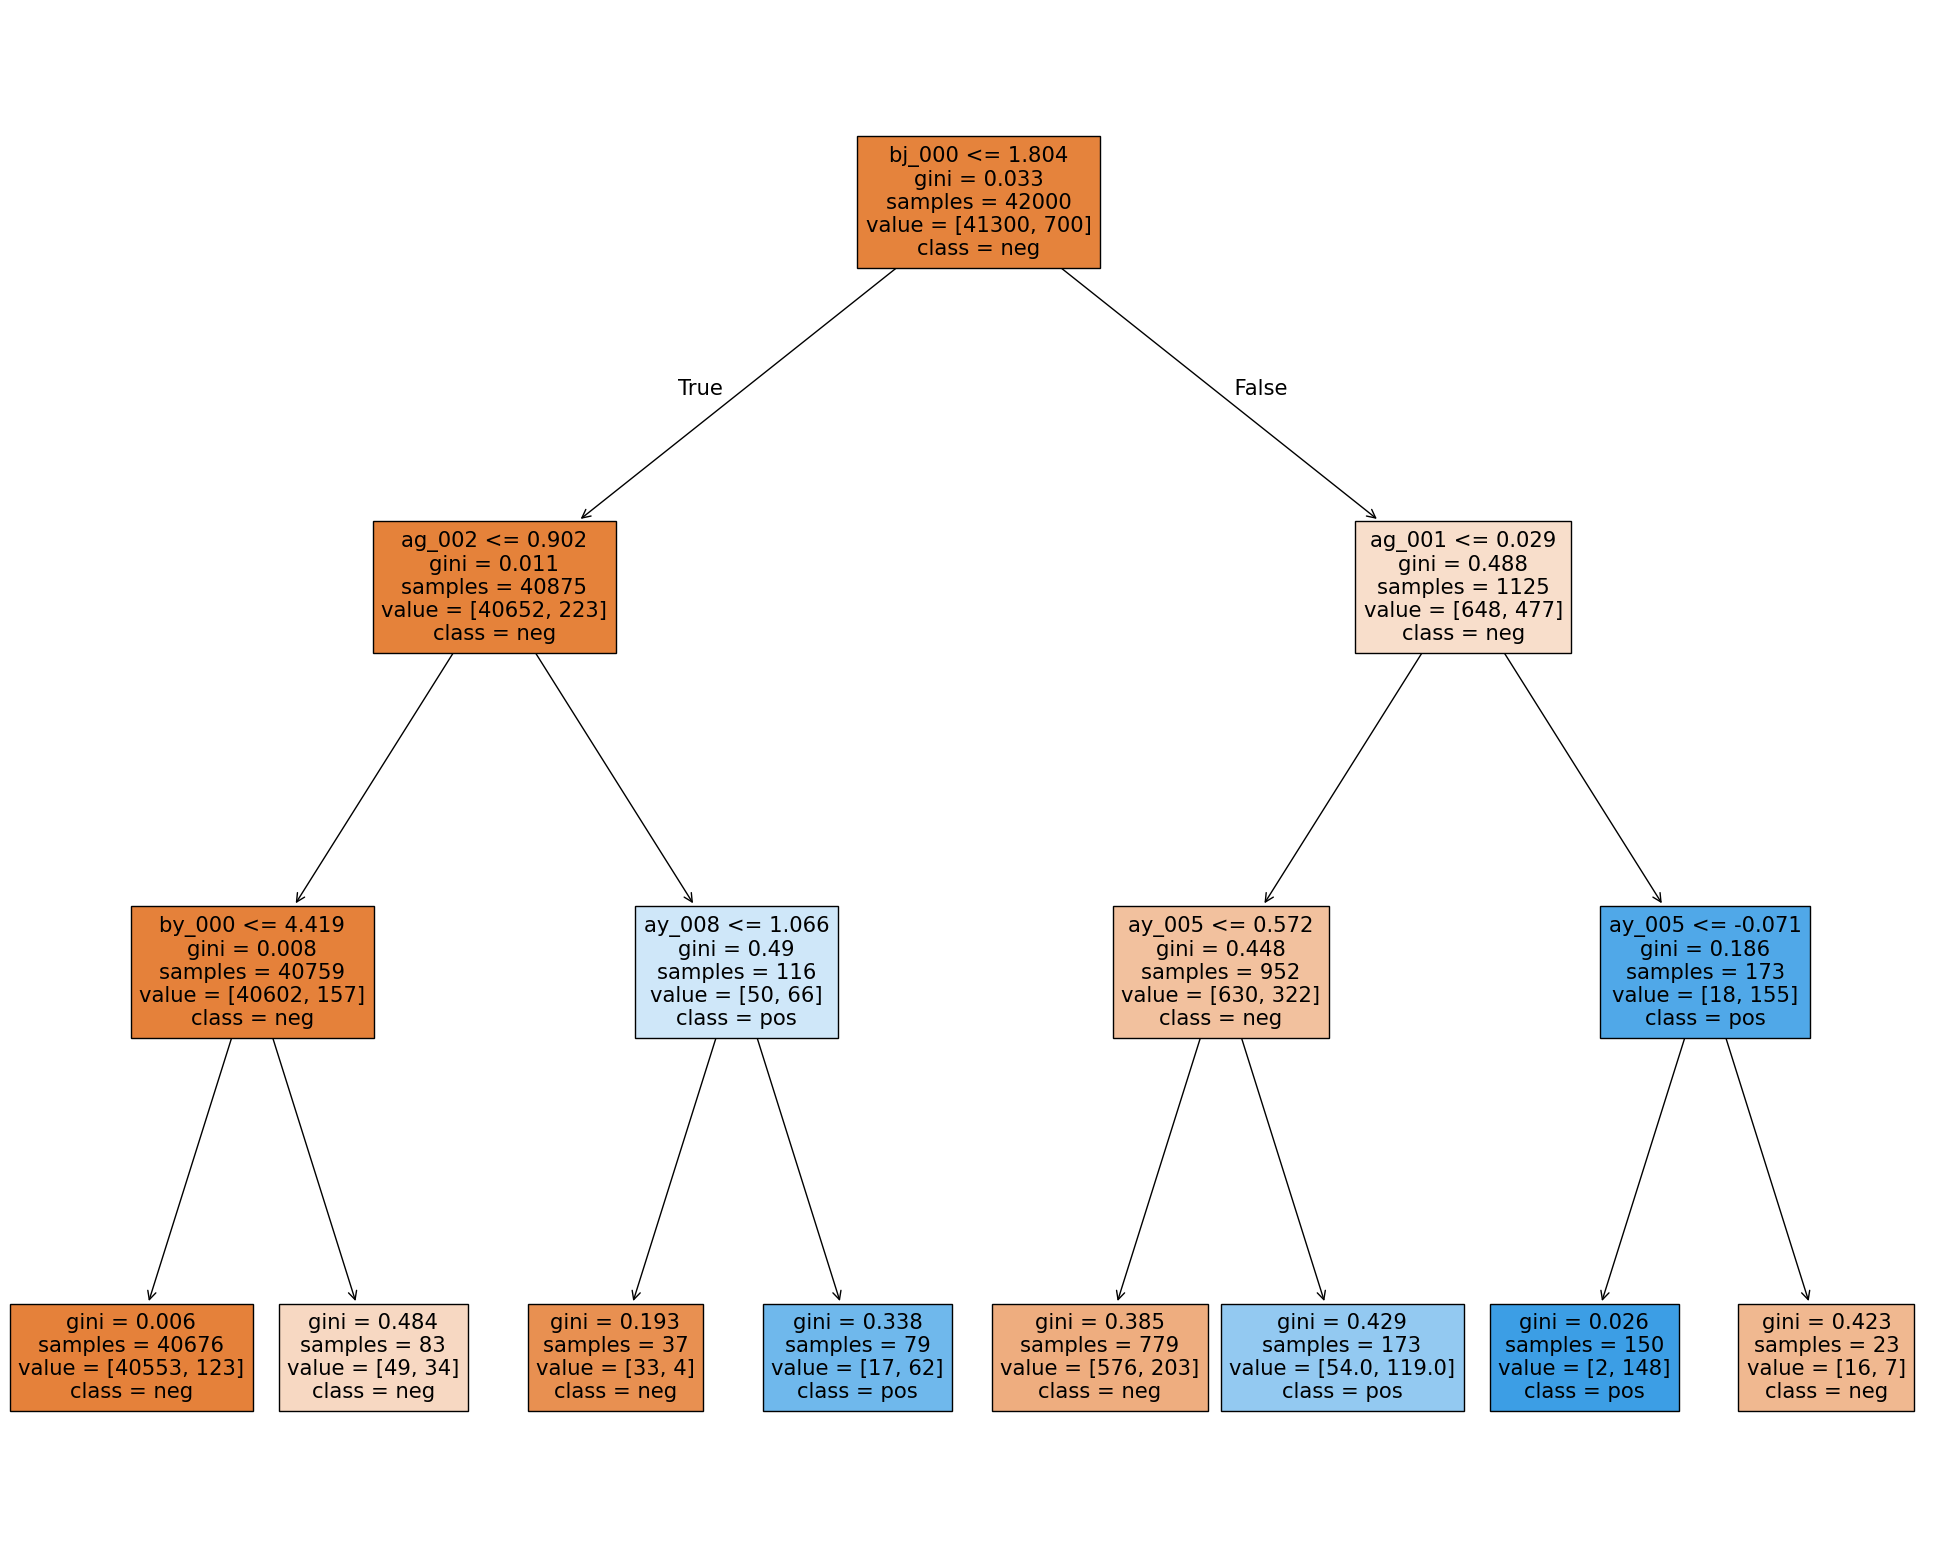

In [32]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Model_DT,
                   feature_names=data.columns,
                   class_names=["neg", "pos"],
                   filled=True)

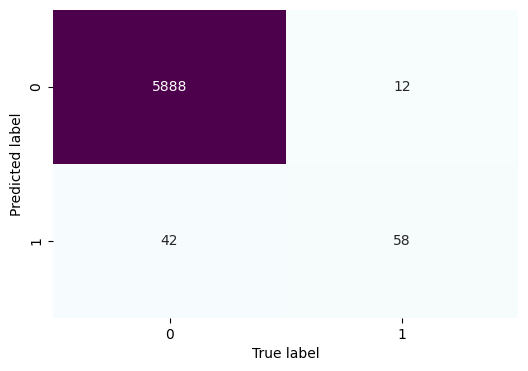

In [33]:
# Validation Set
cm = confusion_matrix(y_val, x_val_predict)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

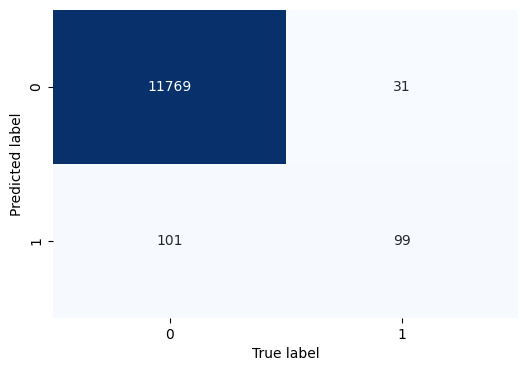

In [34]:
# Test Set
cm = confusion_matrix(y_test, x_test_predict)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

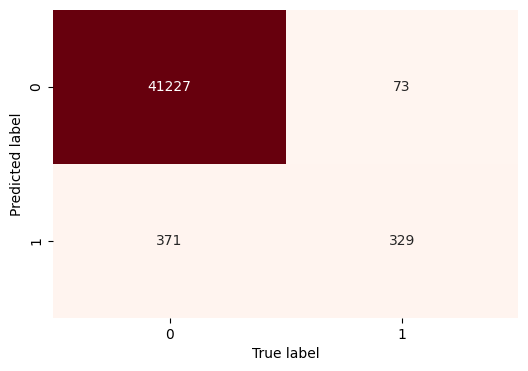

In [35]:
# Training Set
cm = confusion_matrix(Y_train, x_train_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

### The Model is overfit on the class 'neg' concentrating to minimize the errors for neg class samples and it misclassifies significant proportion of the 'pos' classes samples almost half of them in all the three training, testing and validation sets.

# -----------------------------------------------------------------------------------------------------------

### Fitting Logistic regression by cross validating for regularization choice L1/ L2 and the corresponding regularization parameters

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
Model2 = LogisticRegression(max_iter=2500)

In [38]:
parameters_logistic = {'penalty': ['l1','l2'], 
                       'C' : [0.001, 0.01, 0.1, 1, 10, 100]}          

In [39]:
L = GridSearchCV(Model2, param_grid=parameters_logistic, cv=5 )
L.fit(x_val,y_val)
Model_Logistic = L.best_estimator_
print(f"Best Logistic Regression parameters: {L.best_params_}")

Best Logistic Regression parameters: {'C': 0.01, 'penalty': 'l2'}


C:\Users\MANOJ\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MANOJ\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MANOJ\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\MANOJ\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py", line 1

In [40]:
Model_Logistic.fit(X_train, Y_train)

LogisticRegression(C=0.01, max_iter=2500)

In [41]:
x_train_pred2 = Model_Logistic.predict(X_train)
x_train_pred2

array(['neg', 'neg', 'neg', ..., 'neg', 'neg', 'neg'], dtype=object)

In [42]:
x_val_predict2 = Model_Logistic.predict(x_val)
x_val_predict2

array(['neg', 'neg', 'neg', ..., 'neg', 'neg', 'neg'], dtype=object)

In [43]:
x_test_predict2 = Model_Logistic.predict(x_test)
x_test_predict2

array(['neg', 'neg', 'neg', ..., 'neg', 'neg', 'neg'], dtype=object)

In [44]:
# Test report
print(classification_report(x_test_predict2, y_test))

              precision    recall  f1-score   support

         neg       1.00      0.99      1.00     11844
         pos       0.61      0.78      0.69       156

    accuracy                           0.99     12000
   macro avg       0.80      0.89      0.84     12000
weighted avg       0.99      0.99      0.99     12000



In [45]:
# Train report
print(classification_report(x_train_pred2, Y_train))

              precision    recall  f1-score   support

         neg       1.00      0.99      1.00     41480
         pos       0.64      0.86      0.73       520

    accuracy                           0.99     42000
   macro avg       0.82      0.93      0.86     42000
weighted avg       0.99      0.99      0.99     42000



In [46]:
# Validation report
print(classification_report(x_val_predict2, y_val))

              precision    recall  f1-score   support

         neg       1.00      0.99      1.00      5922
         pos       0.65      0.83      0.73        78

    accuracy                           0.99      6000
   macro avg       0.82      0.91      0.86      6000
weighted avg       0.99      0.99      0.99      6000



In [47]:
print("Training Accuracy: ", Model_Logistic.score(X_train, Y_train))
print("Validation Accuracy: ", Model_Logistic.score(x_val, y_val))
print("Testing Accuracy: ", Model_Logistic.score(x_test, y_test))

Training Accuracy:  0.9921904761904762
Validation Accuracy:  0.992
Testing Accuracy:  0.9906666666666667


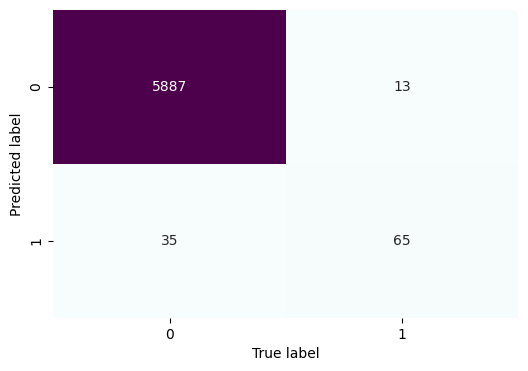

In [48]:
# Validation Set
cm = confusion_matrix(y_val, x_val_predict2)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

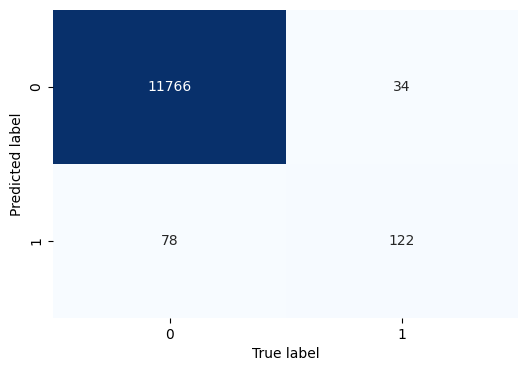

In [49]:
# Test Set
cm = confusion_matrix(y_test, x_test_predict2)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

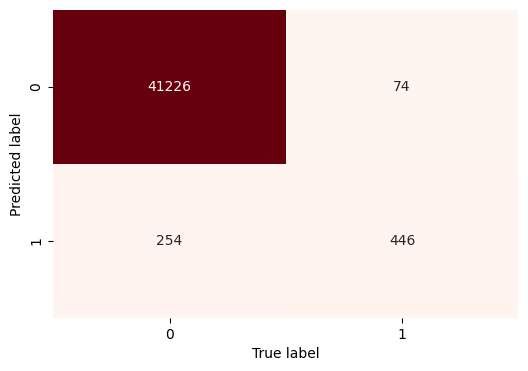

In [50]:
# Training Set
cm = confusion_matrix(Y_train, x_train_pred2)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

### The Model is overfit on the class 'neg',  concentrating to minimize the errors for neg class samples and it misclassifies significant proportion of the 'pos' classes samples almost half of them in all the three training, testing and validation sets. The performance is better than Decision Trees as it misclassifies lesser number of samples of pos class comparitively.

# -----------------------------------------------------------------------------------------------------------

### Fitting Support Vector classifier by cross validating for kernel and kernel-params.

In [51]:
from sklearn.svm import SVC

In [52]:
# Setting scaling parameters of different kernel functions
parameters_SVC = [
    {'kernel': ['linear'],
    'C': [0.1, 1, 10, 100]}, 
    {'kernel': ['poly'],
     'C': [0.1, 1, 10, 100],
     'degree': [2, 3, 4],
     'coef0': [0, 1]},
    {'kernel': ['rbf'],
     'C': [0.1, 1, 10, 100],
     'gamma': ['scale', 'auto']},
    {'kernel': ['sigmoid'],
     'C': [0.1, 1, 10, 100],
     'gamma': ['scale', 'auto'],
     'coef0': [0, 1]}
]


In [53]:
Model3 = SVC()

In [54]:
S = GridSearchCV(Model3, param_grid=parameters_SVC, cv=5)
S.fit(x_val, y_val)
Model_SVC = S.best_estimator_
print(f"Best Logistic Regression parameters: {S.best_params_}")

Best Logistic Regression parameters: {'C': 1, 'coef0': 1, 'degree': 2, 'kernel': 'poly'}


In [55]:
Model_SVC.fit(X_train, Y_train)

SVC(C=1, coef0=1, degree=2, kernel='poly')

In [56]:
x_train_pred3 = Model_SVC.predict(X_train)
x_train_pred3

array(['neg', 'neg', 'neg', ..., 'neg', 'neg', 'neg'], dtype=object)

In [57]:
x_val_predict3 = Model_SVC.predict(x_val)
x_val_predict3

array(['neg', 'neg', 'neg', ..., 'neg', 'neg', 'neg'], dtype=object)

In [58]:
x_test_predict3 = Model_SVC.predict(x_test)
x_test_predict3

array(['neg', 'neg', 'neg', ..., 'neg', 'neg', 'neg'], dtype=object)

In [59]:
# Test report
print(classification_report(x_test_predict3, y_test))

              precision    recall  f1-score   support

         neg       1.00      0.99      1.00     11830
         pos       0.69      0.81      0.75       170

    accuracy                           0.99     12000
   macro avg       0.84      0.90      0.87     12000
weighted avg       0.99      0.99      0.99     12000



In [60]:
# Train report
print(classification_report(x_train_pred3, Y_train))

              precision    recall  f1-score   support

         neg       1.00      1.00      1.00     41393
         pos       0.86      1.00      0.92       607

    accuracy                           1.00     42000
   macro avg       0.93      1.00      0.96     42000
weighted avg       1.00      1.00      1.00     42000



In [61]:
# Validation report
print(classification_report(x_val_predict3, y_val))

              precision    recall  f1-score   support

         neg       1.00      1.00      1.00      5902
         pos       0.76      0.78      0.77        98

    accuracy                           0.99      6000
   macro avg       0.88      0.89      0.88      6000
weighted avg       0.99      0.99      0.99      6000



In [62]:
print("Training Accuracy: ", Model_SVC.score(X_train, Y_train))
print("Validation Accuracy: ", Model_SVC.score(x_val, y_val))
print("Testing Accuracy: ", Model_SVC.score(x_test, y_test))

Training Accuracy:  0.9976428571428572
Validation Accuracy:  0.9923333333333333
Testing Accuracy:  0.9921666666666666


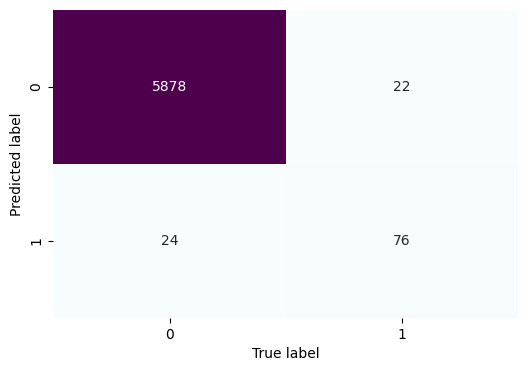

In [63]:
# Validation Set
cm = confusion_matrix(y_val, x_val_predict3)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

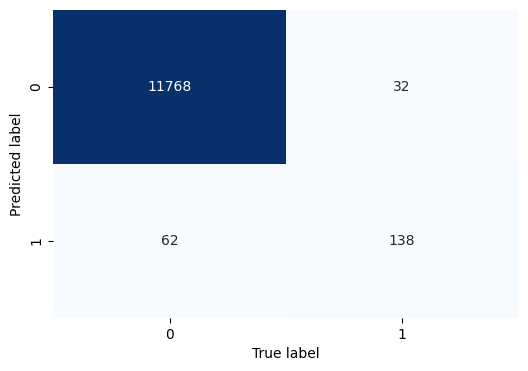

In [64]:
# Test Set
cm = confusion_matrix(y_test, x_test_predict3)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

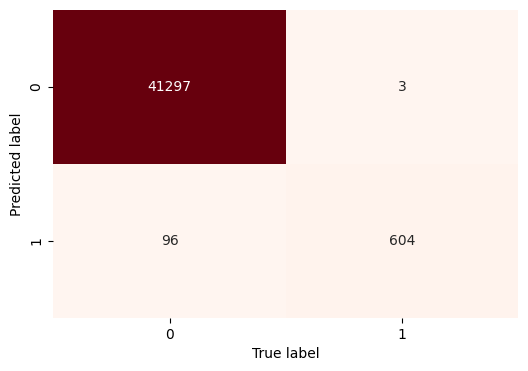

In [65]:
# Training Set
cm = confusion_matrix(Y_train, x_train_pred3)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

### Therefore the SVC model overfits on the neg class,  concentrating to minimize the errors for neg class samples and misclassifies a quite significant portion of under represented class and performance is at par with the other two classifiers i.e., Decision Trees and Logistic Regression.

# Baseline Classifiers: Macro Avg F1 

| Classifier            |  | Train | Test | Validation |
|----------------------|----------------|-------|------|------------|
| Decision Tree        |                | 0.80  | 0.80 | 0.84       |
| Logistic Regression   |                | 0.86  | 0.84 | 0.86       |
| SVC                  |                | 0.96  | 0.87 | 0.88       |
